# Heart Disease Prediction

### Import libraries

we imported  first all the neccesary libraries. The main library that is `pandas`. `Pandas` to create and work with dataframes and datasets. 

For visualization the  library `matplotlib` and subpackage `pyplot`. 

For implementing Machine Learning models and processing of data, the `sklearn` library.

For removing warnings that produce by training model, we used the library `warnings`

In [2]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
import numpy as np

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Data Exploration (EDA)

### •Initial Data Inspection:

In [33]:
data = pd.read_csv("cardio_train.csv", sep=";")
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


### Check data types

In [39]:
print(data.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


### Null values

In [42]:
print(data.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### Check duplicates

In [46]:
print(data.duplicated().sum())

0


### Dimensionality

In [49]:
print(data.shape)

(70000, 13)


#### • Descriptive Statistics:

In [52]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### The issues should be addressed to clean the data before proceeding with machine learning models
Age Column: The mean age value is unusually high (19468.87), indicating that the age might be in hundredths of a year. This column needs to be converted to actual years.

Blood Pressure (ap_hi, ap_lo): There are extreme and likely erroneous values, such as -150 for ap_hi and -70 for ap_lo. These need to be corrected or removed.

Binary Variables (smoke, alco, active): Ensure these binary variables only contain values 0 and 1, as there might be incorrect or inconsistent entries

#### Skewness

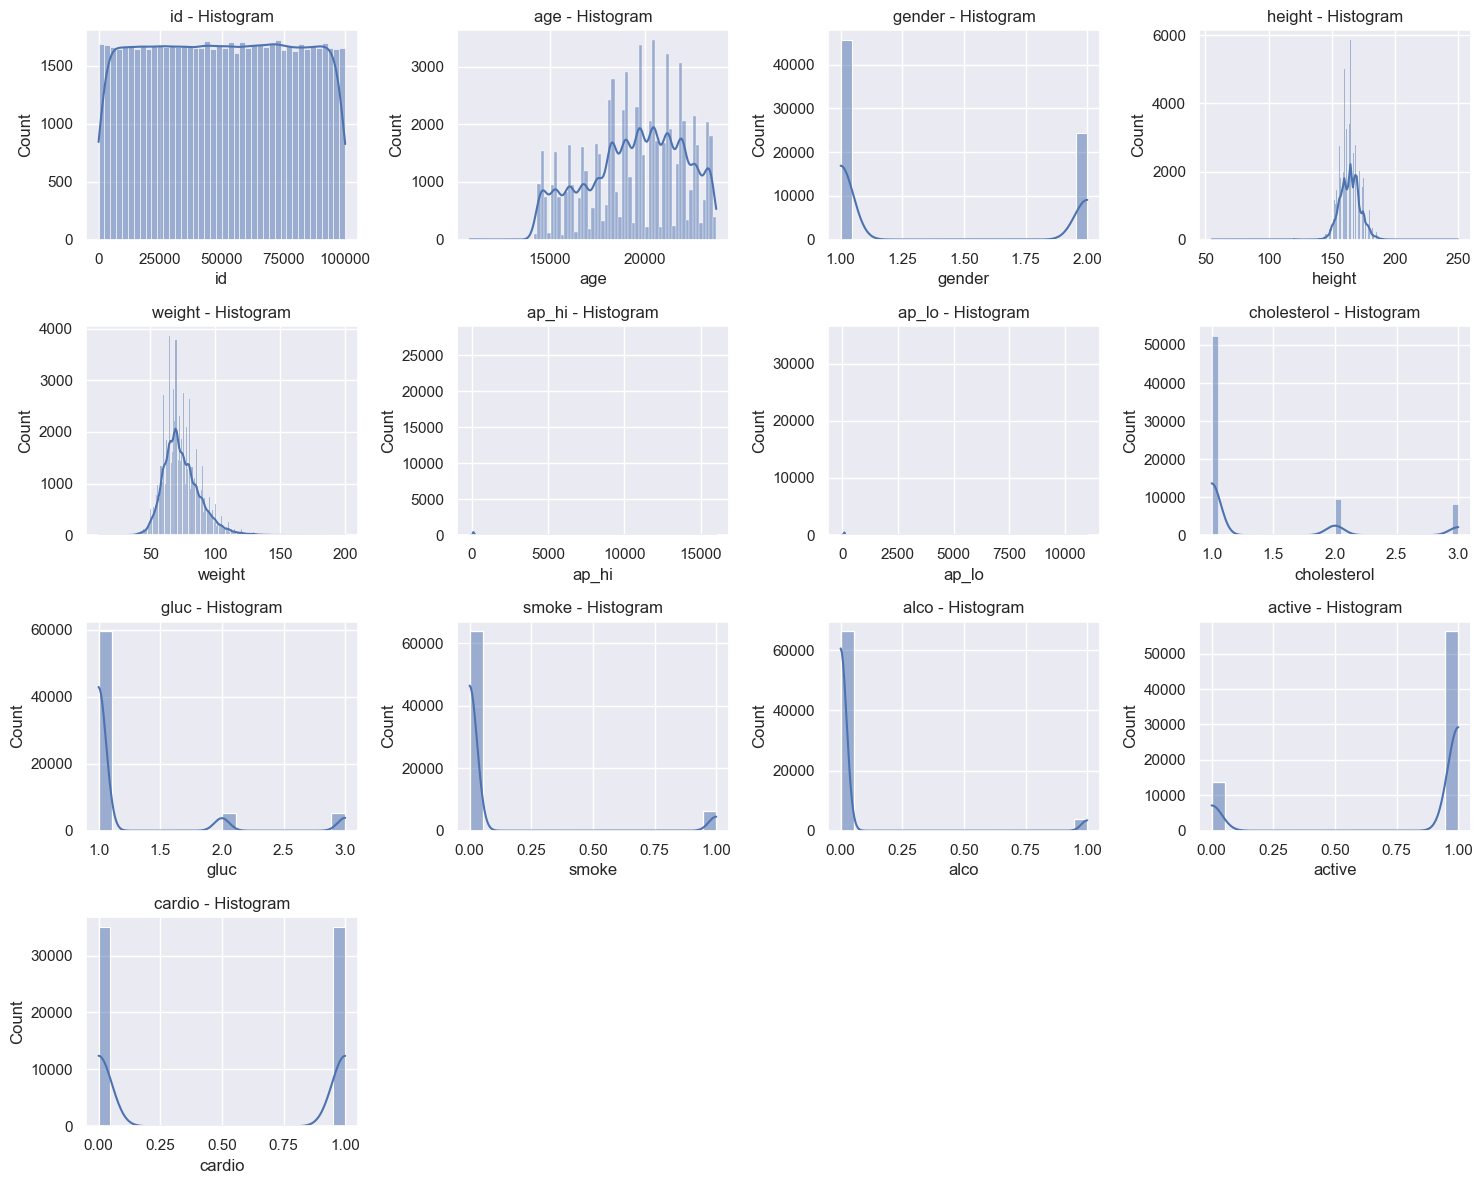

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical feature
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(data[feature], kde=True)  
    plt.title(f'{feature} - Histogram')

plt.tight_layout()
plt.show()

#### Interpretation :
Right Skewed : The majority of the data is lower, with a few higher values causing the distribution to stretch to the right.

Left Skewed : The majority of the data is higher, with a few lower values causing the distribution to stretch to the left.

Symetrical : The distribution is balanced, and there’s no significant asymmetry.

#### Variance

In [64]:
# Calculate variance for each numerical feature
variance = data.select_dtypes(include=['int64', 'float64']).var()
print(variance)

id             8.323976e+08
age            6.087331e+06
gender         2.273745e-01
height         6.740617e+01
weight         2.072378e+02
ap_hi          2.371952e+04
ap_lo          3.552189e+04
cholesterol    4.627405e-01
gluc           3.274933e-01
smoke          8.036307e-02
alco           5.088079e-02
active         1.577512e-01
cardio         2.500035e-01
dtype: float64


#### Interpretation
Columns with high variance (e.g., id, age, ap_hi, ap_lo) may have a wide spread in values, which could indicate useful features for predictive modeling, but some columns like id should be discarded as they do not hold predictive power.

Columns with low variance (e.g., gender, smoke, alco, cardio) indicate less variability in the data, which might mean they don’t contribute much in terms of differentiating between observations, especially if they are binary features.

### Outliers Detection :

#### Boxplot

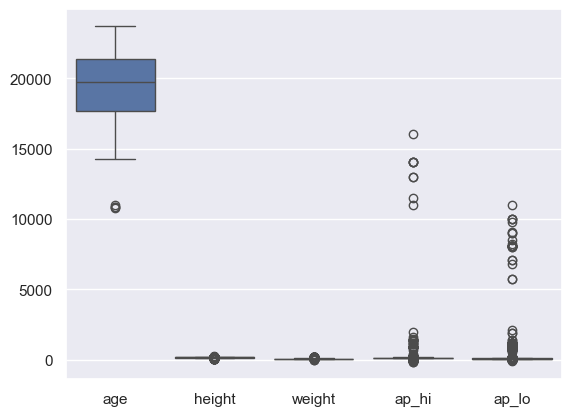

In [75]:
sns.boxplot(data=data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.show()

### IQR Method :

In [81]:
# Calculate IQR for numerical features
Q1 = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].quantile(0.25)
Q3 = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] < (Q1 - 1.5 * IQR)) |
                (data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] > (Q3 + 1.5 * IQR)))

print(outliers_iqr)

         age  height  weight  ap_hi  ap_lo
0      False   False   False  False  False
1      False   False   False  False  False
2      False   False   False  False  False
3      False   False   False  False  False
4      False   False   False  False   True
...      ...     ...     ...    ...    ...
69995  False   False   False  False  False
69996  False   False    True  False  False
69997  False   False   False   True  False
69998  False   False   False  False  False
69999  False   False   False  False  False

[70000 rows x 5 columns]


#### Vizualisation

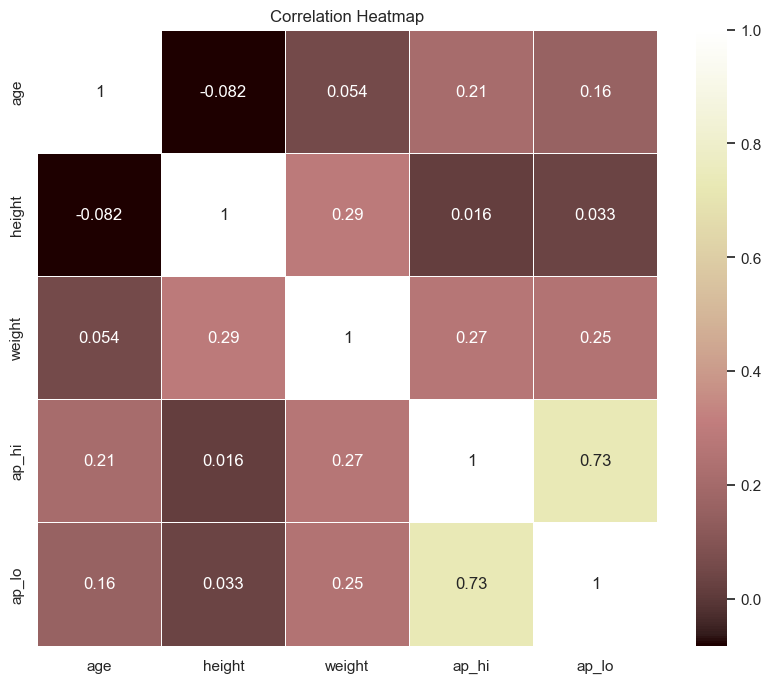

In [204]:
# Calculate the correlation matrix
correlation_matrix = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.

It’s also worth noting that some attributes are highly correlated with the target 

#### Histograms for numerical features

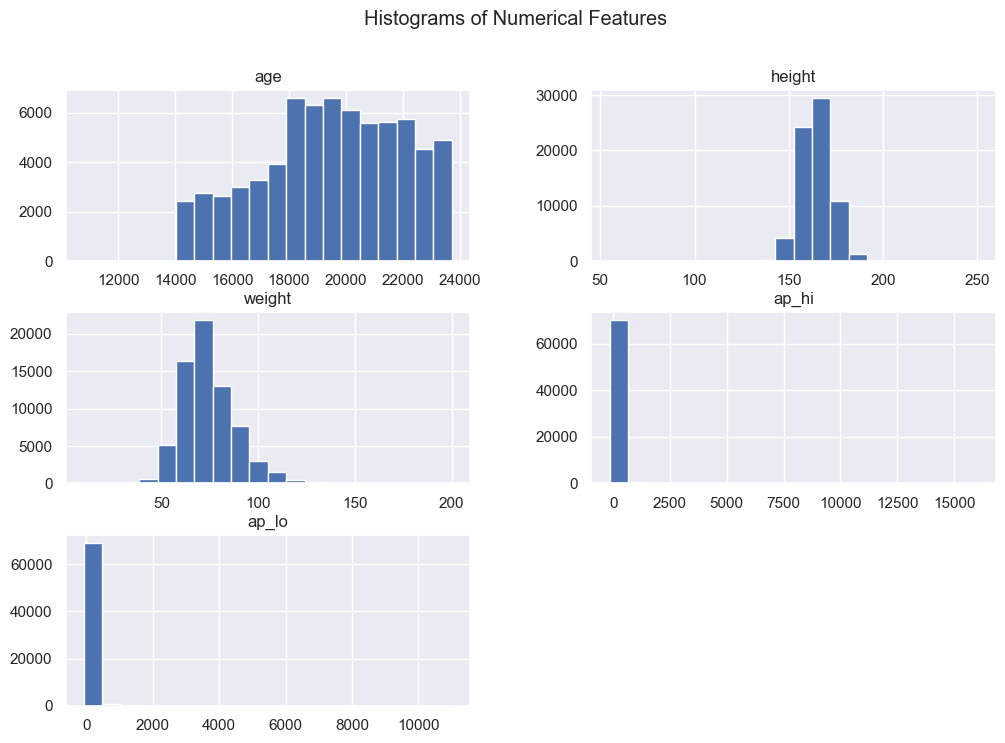

In [94]:
# Plot histograms for numerical features
data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#### Scatterplots:

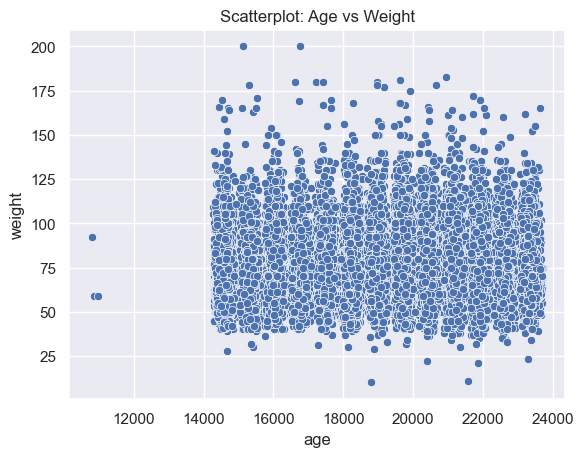

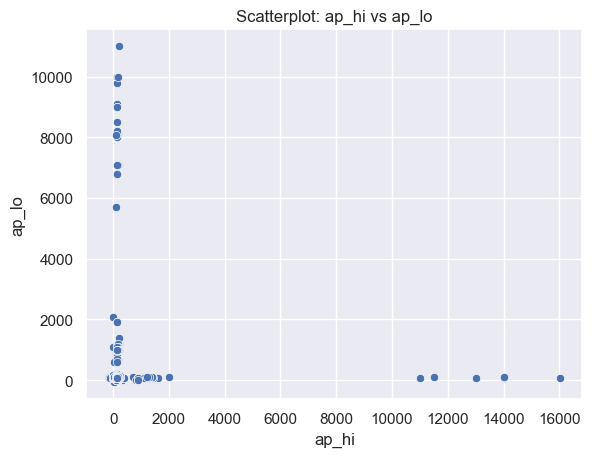

In [97]:
# Scatterplot between age and weight
sns.scatterplot(x='age', y='weight', data=data)
plt.title("Scatterplot: Age vs Weight")
plt.show()

# Scatterplot between ap_hi and ap_lo
sns.scatterplot(x='ap_hi', y='ap_lo', data=data)
plt.title("Scatterplot: ap_hi vs ap_lo")
plt.show()

#### Pairplot

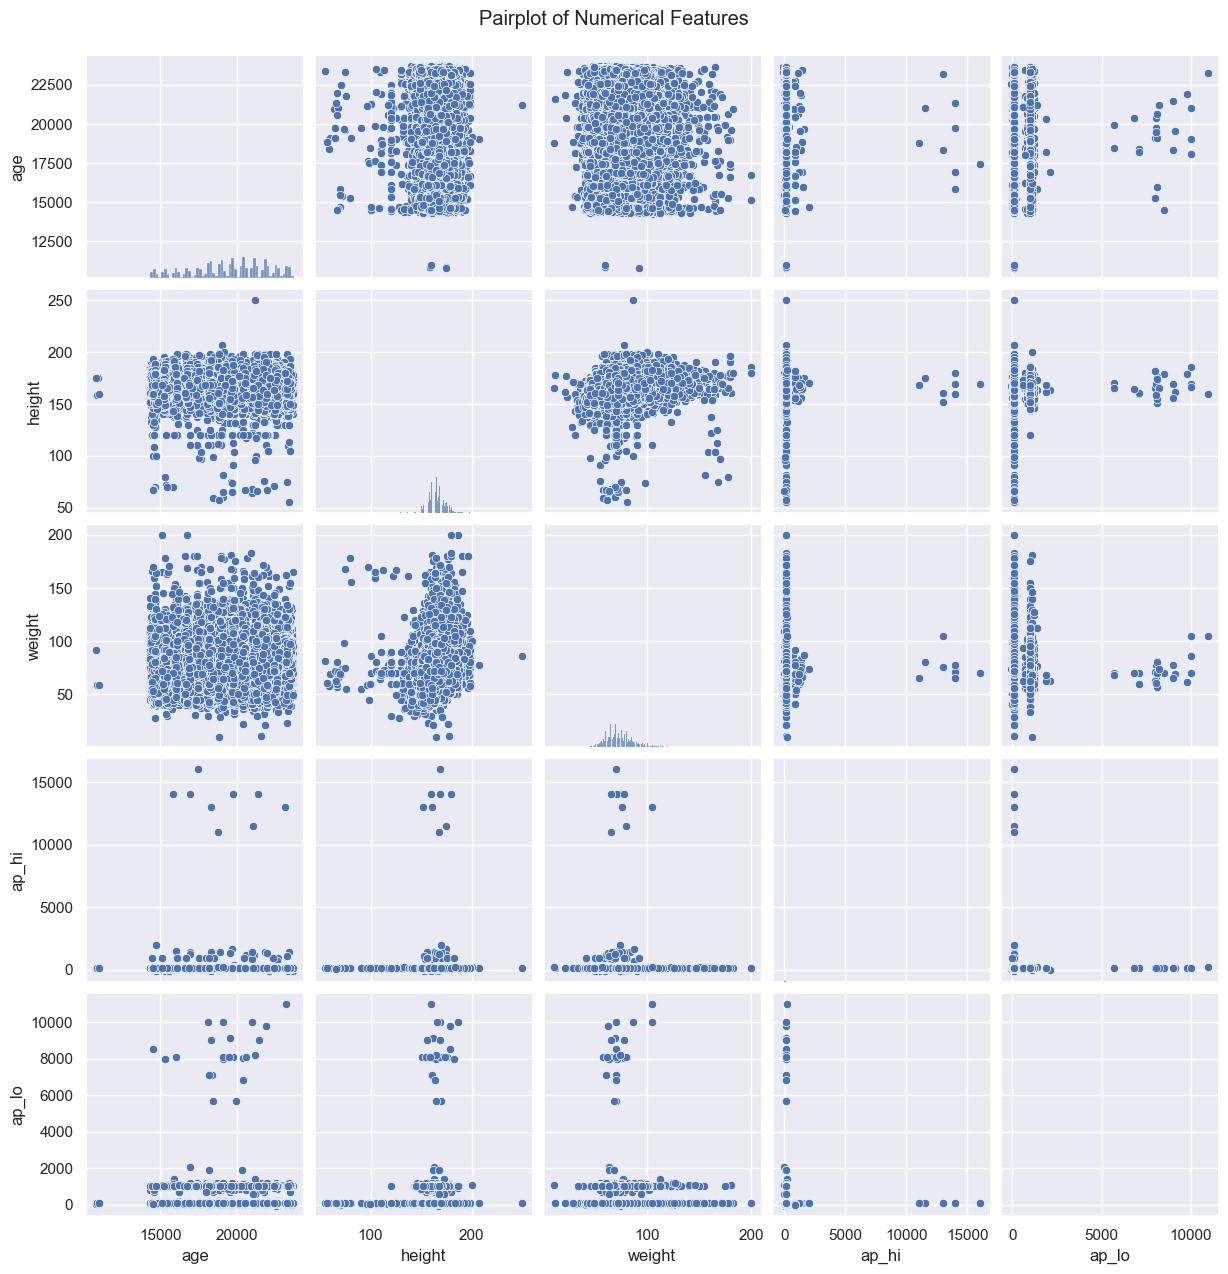

In [100]:
# Pairplot for numerical features
sns.pairplot(data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

#### Countplot

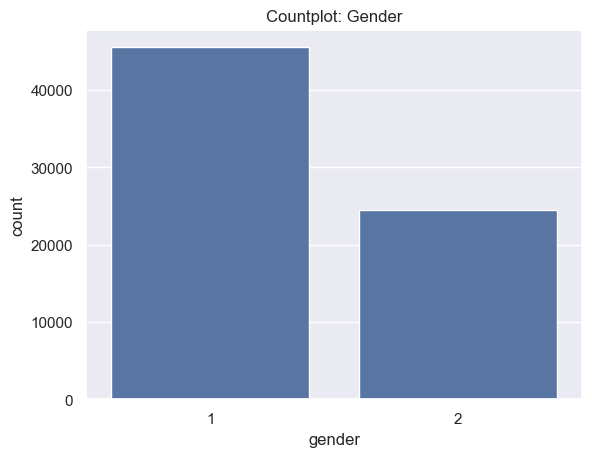

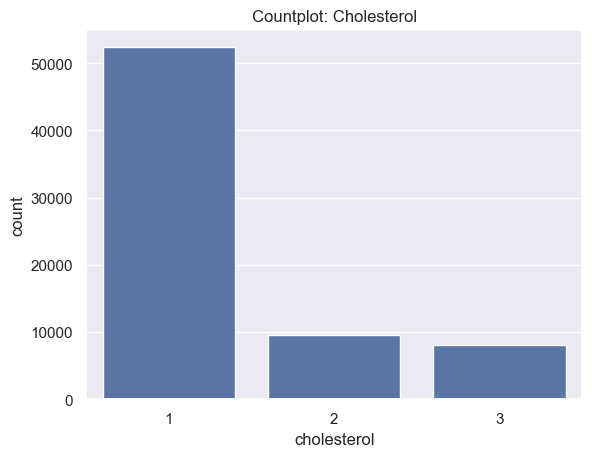

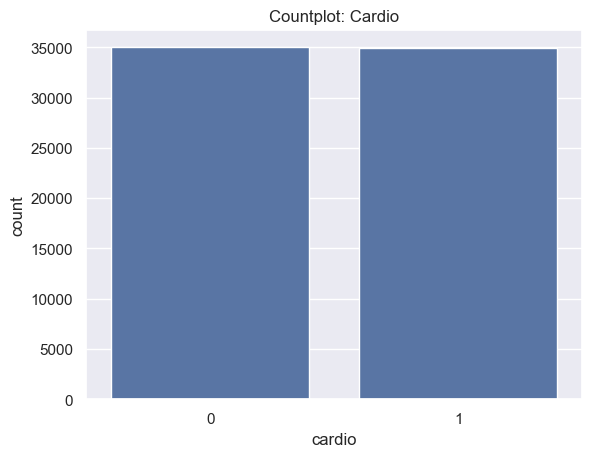

In [102]:
# Countplot for gender
sns.countplot(x='gender', data=data)
plt.title("Countplot: Gender")
plt.show()

# Countplot for cholesterol
sns.countplot(x='cholesterol', data=data)
plt.title("Countplot: Cholesterol")
plt.show()

# Countplot for cardio (target variable)
sns.countplot(x='cardio', data=data)
plt.title("Countplot: Cardio")
plt.show()


#### Barcharts

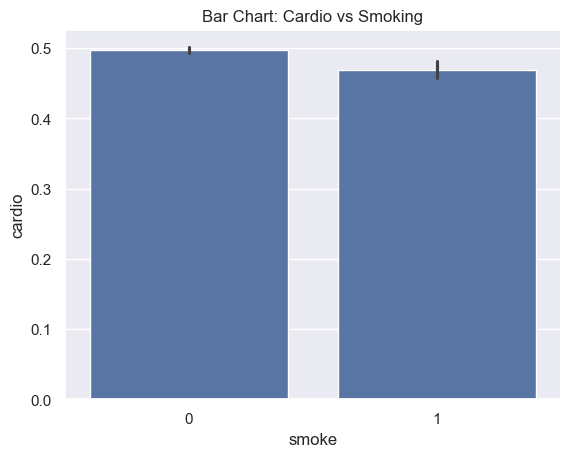

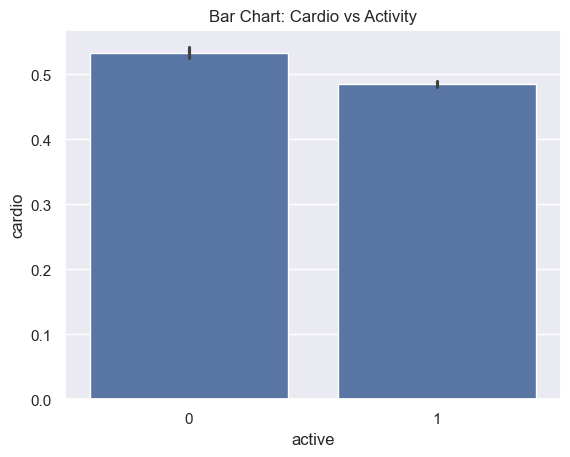

In [213]:
# Bar chart for relationship between cardio and smoking
sns.barplot(x='smoke', y='cardio', data=data)
plt.title("Bar Chart: Cardio vs Smoking")
plt.show()

# Bar chart for relationship between cardio and activity level
sns.barplot(x='active', y='cardio', data=data)
plt.title("Bar Chart: Cardio vs Activity")
plt.show()

#### Summary of Visualizations:
Correlation Heatmap: To examine relationships between numerical variables.

Scatterplots: To explore relationships between pairs of numerical features.

Pairplot: To explore relationships between multiple features at once.

Count Plot: To examine the frequency of categorical features.

Bar Charts: To explore relationships between categorical variables and the target variable.

#### Data Preprocessing :

#### Data Cleaning

####  Age Column
Issue: The age was recorded in days, leading to unusually high mean values.

Solution: Converted age from days to years by dividing the values by 365.

Technique Used: Unit transformation.

In [117]:
data['age'] = data['age'] // 365

####  Blood Pressure (ap_hi, ap_lo)
Issue: Extreme and erroneous values (e.g., negative values for blood pressure).
                                     
Solution: Removed rows with systolic blood pressure (ap_hi) outside 90–200 mmHg and diastolic blood pressure (ap_lo) outside 60–120 mmHg.

Technique Used: Threshold-based filtering which is commonly used to handle outliers, eliminate noise, or select relevant features.

In [120]:
data = data[(data['ap_hi'] >= 90) & (data['ap_hi'] <= 200)]
data = data[(data['ap_lo'] >= 60) & (data['ap_lo'] <= 120)]

#### Cholesterol and Glucose (gluc)
Issue: Potential invalid entries; these columns should only contain categorical values (1, 2, 3).

Solution: Filtered rows where values in these columns were outside the valid range.

Technique Used: Value verification.

In [128]:
valid_categories = [1, 2, 3]
data = data[data['cholesterol'].isin(valid_categories)]
data = data[data['gluc'].isin(valid_categories)]

#### Binary Variables (smoke, alco, active)
Issue: Binary variables should only contain 0 and 1; potential for incorrect values.
    
Solution: Verified and removed rows where these variables had values other than 0 or 1.

Technique Used: Value validation for binary features.

In [126]:
binary_columns = ['smoke', 'alco', 'active']
for col in binary_columns:
    data = data[data[col].isin([0, 1])]

#### Rechecking After Cleaning

In [131]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000
mean,49973.445292,52.831258,1.348782,164.368193,74.128091,126.644348,81.323584,1.364305,1.225628,0.087828,0.053334,0.803444,0.494797
std,28847.052002,6.768293,0.476588,8.182001,14.308865,16.374011,9.221299,0.678803,0.571655,0.283046,0.224700,0.397397,0.499977
min,0.000000,29.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25002.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74875.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

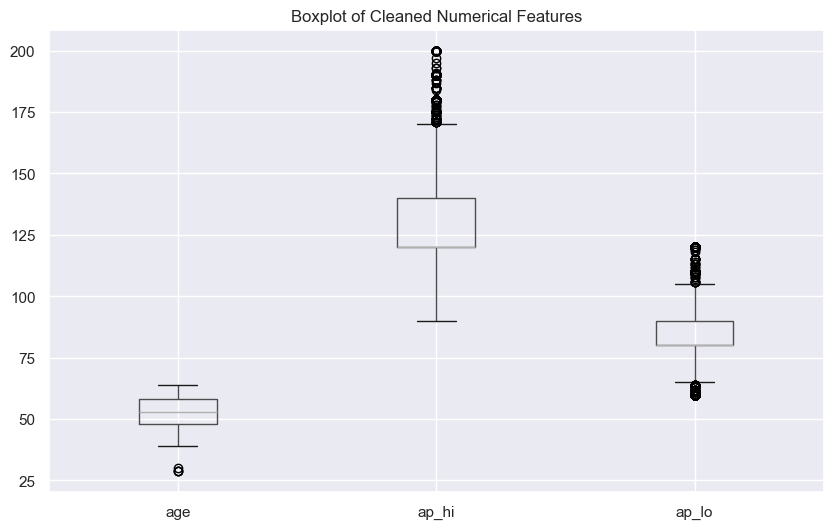

In [135]:
# Boxplot for cleaned numerical features
data[['age', 'ap_hi', 'ap_lo']].boxplot(figsize=(10, 6))
plt.title("Boxplot of Cleaned Numerical Features")
plt.show()

#### Feature Engineering

#### Standarization

In [140]:
from sklearn.preprocessing import StandardScaler
# List of numerical columns to scale
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])
# Check the scaled data
print(data.head())

   id       age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0   0 -0.418315       2  0.443881 -0.847599 -1.016518 -0.143537            1   
1   1  0.320429       1 -1.022764  0.759808  0.815668  0.940917            3   
2   2 -0.270566       1  0.077220 -0.707824  0.204939 -1.227990            3   
3   3 -0.713813       2  0.566101  0.550146  1.426396  2.025371            1   
4   4 -0.861561       1 -1.022764 -1.266923 -1.627246 -2.312444            1   

   gluc  smoke  alco  active  cardio  
0     1      0     0       1       0  
1     1      0     0       1       1  
2     1      0     0       0       1  
3     1      0     0       1       1  
4     1      0     0       0       0  


#### Feature Selection 

#### Chi-Square Method

In [209]:
from sklearn.feature_selection import SelectKBest, chi2
X = data.drop(columns=['cardio'])  # Features
y = data['cardio']  # Target variable

# Since chi-square works with non-negative values, ensure no negative values are in X
X_abs = X.abs()

# Apply chi-square feature selection
chi2_selector = SelectKBest(chi2, k='all') 
X_new = chi2_selector.fit_transform(X_abs, y)

# Get the scores of each feature
feature_scores = chi2_selector.scores_

# Create a DataFrame to view the feature scores
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': feature_scores
})

# Sort features based on chi-square score
feature_scores_df = feature_scores_df.sort_values(by='Chi-Square Score', ascending=False)

feature_scores_df

,Feature,Chi-Square Score
0,id,16518.574821
7,cholesterol,1129.276708
5,ap_hi,729.412109
6,ap_lo,495.783947
8,gluc,145.404794
4,weight,65.188890
11,active,19.449967
1,age,18.450900
9,smoke,16.458641
3,height,9.689990


In [147]:
# Drop the 'id' column
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']

#### Model Training 

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [157]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on training and test sets
y_pred_train_logreg = logreg_model.predict(X_train)
y_pred_test_logreg = logreg_model.predict(X_test)

# Compute training and test accuracies
train_accuracy_logreg = accuracy_score(y_train, y_pred_train_logreg)
test_accuracy_logreg = accuracy_score(y_test, y_pred_test_logreg)

# Get classification report for detailed metrics
class_report_logreg = classification_report(y_test, y_pred_test_logreg)

# Display results
print(f"Logistic Regression Training Accuracy: {train_accuracy_logreg:.4f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg:.4f}")
print(f"Logistic Regression Classification Report:\n{class_report_logreg}")


Logistic Regression Training Accuracy: 0.7295
Logistic Regression Test Accuracy: 0.7202
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6988
           1       0.74      0.66      0.70      6696

    accuracy                           0.72     13684
   macro avg       0.72      0.72      0.72     13684
weighted avg       0.72      0.72      0.72     13684



#### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on training and test sets
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Compute training and test accuracies
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

# Get classification report for detailed metrics
class_report_rf = classification_report(y_test, y_pred_test_rf)

# Display results
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest Classification Report:\n{class_report_rf}")

Random Forest Training Accuracy: 0.9797
Random Forest Test Accuracy: 0.7056
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6988
           1       0.70      0.69      0.70      6696

    accuracy                           0.71     13684
   macro avg       0.71      0.71      0.71     13684
weighted avg       0.71      0.71      0.71     13684



### KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on training and test sets
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

# Compute training and test accuracies
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

# Get classification report for detailed metrics
class_report_knn = classification_report(y_test, y_pred_test_knn)

# Display results
print(f"K-Nearest Neighbors Training Accuracy: {train_accuracy_knn:.4f}")
print(f"K-Nearest Neighbors Test Accuracy: {test_accuracy_knn:.4f}")
print(f"K-Nearest Neighbors Classification Report:\n{class_report_knn}")

K-Nearest Neighbors Training Accuracy: 0.7830
K-Nearest Neighbors Test Accuracy: 0.6953
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6988
           1       0.69      0.68      0.69      6696

    accuracy                           0.70     13684
   macro avg       0.70      0.70      0.70     13684
weighted avg       0.70      0.70      0.70     13684



#### K-Means

In [187]:
from scipy.stats import mode
import numpy as np

# Find the most common label for each cluster (cluster 0 and cluster 1)
mode_result_0 = mode(y_train[train_clusters == 0])
mode_result_1 = mode(y_train[train_clusters == 1])

# Check the mode result to debug
print("Mode result for cluster 0:", mode_result_0)
print("Mode result for cluster 1:", mode_result_1)

# Safe access to mode value
if isinstance(mode_result_0.mode, np.ndarray):
    cluster_0_mode = mode_result_0.mode[0]
else:
    cluster_0_mode = mode_result_0.mode  # If mode is scalar, take it directly

if isinstance(mode_result_1.mode, np.ndarray):
    cluster_1_mode = mode_result_1.mode[0]
else:
    cluster_1_mode = mode_result_1.mode  # If mode is scalar, take it directly

# Map clusters to actual labels
train_predictions = np.where(train_clusters == 0, cluster_0_mode, cluster_1_mode)
test_predictions = np.where(test_clusters == 0, cluster_0_mode, cluster_1_mode)

# Compute training and test accuracies
train_accuracy_kmeans = accuracy_score(y_train, train_predictions)
test_accuracy_kmeans = accuracy_score(y_test, test_predictions)

# Get classification report for detailed metrics
class_report_kmeans = classification_report(y_test, test_predictions)

# Display results
print(f"K-Means Training Accuracy: {train_accuracy_kmeans:.4f}")
print(f"K-Means Test Accuracy: {test_accuracy_kmeans:.4f}")
print(f"K-Means Classification Report:\n{class_report_kmeans}")

Mode result for cluster 0: ModeResult(mode=1, count=15134)
Mode result for cluster 1: ModeResult(mode=0, count=23396)
K-Means Training Accuracy: 0.7040
K-Means Test Accuracy: 0.7028
K-Means Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      6988
           1       0.78      0.55      0.65      6696

    accuracy                           0.70     13684
   macro avg       0.72      0.70      0.69     13684
weighted avg       0.72      0.70      0.70     13684



### SVM

In [189]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on training and test sets
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Compute training and test accuracies
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

# Get classification report for detailed metrics
class_report_svm = classification_report(y_test, y_pred_test_svm)

# Display results
print(f"SVM Training Accuracy: {train_accuracy_svm:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm:.4f}")
print(f"SVM Classification Report:\n{class_report_svm}")

SVM Training Accuracy: 0.7369
SVM Test Accuracy: 0.7305
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.75      0.67      0.71      6696

    accuracy                           0.73     13684
   macro avg       0.73      0.73      0.73     13684
weighted avg       0.73      0.73      0.73     13684

